In [1]:

# We import all our dependencies.
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os
import zipfile

import imageio
import glob


In [13]:
folderlist=glob.glob('n2v_train')
filelist=glob.glob('n2v_train\\t\*.tif')
filelist

['n2v_train\\t\\Max_Pos1_001_006.tif', 'n2v_train\\t\\Max_Pos1_001_007.tif']

In [14]:

D=[]    
for i in filelist:
    D1=[]
    with imageio.get_reader(i) as f:
        for c in range(1):
            D1.append(f.get_data(index=c)[None])
        D.append(D1)
imgs=np.array(D)
imgs=np.transpose(imgs,(0,1,3,4,2))

In [15]:
imgs[0].shape

(1, 2048, 2048, 1)

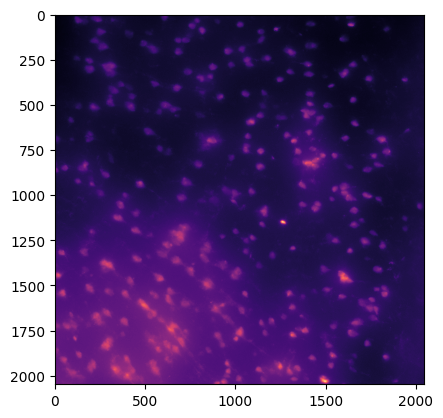

In [16]:
plt.imshow(imgs[1][0,...,0], cmap='magma')
plt.show()

In [17]:
imgs[:1].shape

(1, 1, 2048, 2048, 1)

In [18]:
datagen = N2V_DataGenerator()
patch_shape = (64,64)
X = datagen.generate_patches_from_list(imgs[:1], shape=patch_shape)

X_val = datagen.generate_patches_from_list(imgs[1:], shape=patch_shape)


Generated patches: (8192, 64, 64, 1)
Generated patches: (8192, 64, 64, 1)


In [19]:
# train_steps_per_epoch is set to (number of training patches)/(batch size), like this each training patch 
# is shown once per epoch. 
config_gfp = N2VConfig(X, unet_kern_size=3, 
                   train_steps_per_epoch=int(X.shape[0]/128), train_epochs=20, train_loss='mse', batch_norm=True, 
                   train_batch_size=128, n2v_perc_pix=0.198, n2v_patch_shape=(64, 64), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5)


In [20]:

# a name used to identify the model
model_name = 'n2v_rabies_'
# the base directory in which our model will live
basedir = 'models'
# We are now creating our network model.
#model=N2V(config,model_name,basedir=basedir)
model1= N2V(config_gfp, model_name+'T', basedir=basedir)



In [21]:
# ready to train now
history = model1.train(X, X_val)
#history=model.train(X,X_val)

8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|█████████████████████████████████████████████████| 8192/8192 [00:00<00:00, 8567.59it/s]


Epoch 1/20
64/64 [==============================] - 11s 164ms/step - loss: 0.1781 - n2v_mse: 0.1781 - n2v_abs: 0.2589 - val_loss: 2.1640 - val_n2v_mse: 2.1640 - val_n2v_abs: 1.1046 - lr: 4.0000e-04
Epoch 2/20
64/64 [==============================] - 10s 161ms/step - loss: 0.0697 - n2v_mse: 0.0697 - n2v_abs: 0.1808 - val_loss: 1.3188 - val_n2v_mse: 1.3188 - val_n2v_abs: 0.8850 - lr: 4.0000e-04
Epoch 3/20
64/64 [==============================] - 10s 160ms/step - loss: 0.0648 - n2v_mse: 0.0648 - n2v_abs: 0.1746 - val_loss: 0.8440 - val_n2v_mse: 0.8440 - val_n2v_abs: 0.7002 - lr: 4.0000e-04
Epoch 4/20
64/64 [==============================] - 10s 158ms/step - loss: 0.0557 - n2v_mse: 0.0557 - n2v_abs: 0.1668 - val_loss: 0.5353 - val_n2v_mse: 0.5353 - val_n2v_abs: 0.5430 - lr: 4.0000e-04
Epoch 5/20
64/64 [==============================] - 10s 157ms/step - loss: 0.0561 - n2v_mse: 0.0561 - n2v_abs: 0.1659 - val_loss: 0.1550 - val_n2v_mse: 0.1550 - val_n2v_abs: 0.2917 - lr: 4.0000e-04
Epoch 6/20

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


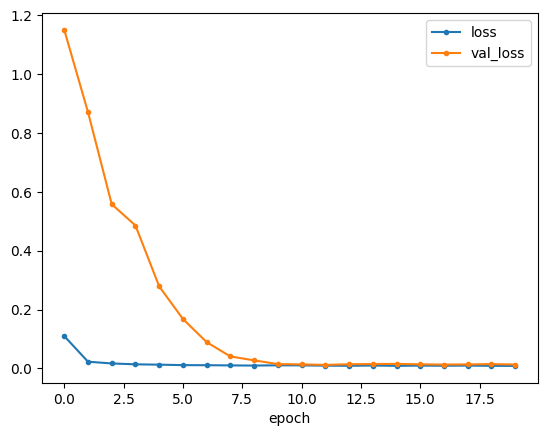

In [12]:
print(sorted(list(history.history.keys())))

plot_history(history,['loss','val_loss']);



In [10]:
import tifffile as tf


for i in [53]:#range(len(imgs)):
    pred_img=[]
    pred_img.append(model1.predict(imgs[i][0,...,0],axes='YX'))
    pred_img.append(model2.predict(imgs[i][0,...,1],axes='YX'))
    pred_img.append(model3.predict(imgs[i][0,...,2],axes='YX'))
    pred_img.append(model4.predict(imgs[i][0,...,3],axes='YX'))
    
    #pred_img=model.predict(imgs[i][0,...],axes='YXC')
    #print(pred_img.shape)
    #for n in range(pred_img.shape[2]):
    #    tf.imwrite(folderlist[0]+'n2vBCseq%02d.tif'%i,pred_img[...,n]-pred_img[...,n].min(),append = True)
    for n in range(len(pred_img)):
        tf.imwrite(folderlist[0]+'n2v%02d.tif'%(i+1),pred_img[n],append = True)
    #tf.imwrite(folderlist[0]+'n2vBCseq%02d.tif'%i,pred_img[0],append = True)
    
    

The input image is of type uint16 and will be casted to float32 for prediction.
The input image is of type uint16 and will be casted to float32 for prediction.
The input image is of type uint16 and will be casted to float32 for prediction.
The input image is of type uint16 and will be casted to float32 for prediction.
